In [18]:
import pickle
import os
import sys

SRC_PARENT_DIR = '../..'
SRC_DIR = '../../src'
DATA_DIR = '/lv_scratch/scratch/graffc0/fire_prediction/data'
EXP_DIR = '/lv_scratch/scratch/graffc0/fire_prediction/experiments'

# Load project packages
src_path = os.path.abspath(os.path.join(SRC_PARENT_DIR))
if src_path not in sys.path:
    sys.path.append(src_path)
    
src_path = os.path.abspath(os.path.join(SRC_DIR))
if src_path not in sys.path:
    sys.path.append(src_path)

In [73]:
SRC_DIR = '../../src'
DATA_DIR = '/lv_scratch/scratch/graffc0/fire_prediction/data'
EXP_DIR = '/lv_scratch/scratch/graffc0/fire_prediction/experiments'

import numpy as np
import os
import sys
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load project packages
src_path = os.path.abspath(os.path.join(SRC_DIR))
if src_path not in sys.path:
    sys.path.append(src_path)
    
from pipeline import train_pipeline
from helper import date_util as du
from helper.multidata_wrapper import MultidataWrapper

from matplotlib import gridspec
import xarray as xr
from tabulate import tabulate


from visualization import mapping as vmap
from helper.geometry import get_default_bounding_box
import helper.loaders as load

from helper.date_util import filter_fire_season

In [20]:
%%capture
with open(os.path.join(EXP_DIR, '332893643485074705870884732640812602742.pkl'), 'rb') as fin:
    hurdle_current = pickle.load(fin)

In [66]:
hurdle_current['summary_results']['test']

{'root_mean_squared_error': (['Avg.', 1, 2, 3, 4, 5],
  [1.3998583668890456,
   1.2707794982154599,
   1.3754480460668637,
   1.4321662958844001,
   1.4509512390972301,
   1.4699467551812744]),
 'mean_absolute_error': (['Avg.', 1, 2, 3, 4, 5],
  [0.051003872439162067,
   0.046363482807148686,
   0.051446126377928891,
   0.05242322025121849,
   0.052142682122735103,
   0.05264385063677917]),
 'root_mean_squared_error_active': (['Avg.', 1, 2, 3, 4, 5],
  [18.826788819113641,
   20.331410927749634,
   20.160945021011422,
   18.745227422208718,
   17.581260771782389,
   17.315099952816034],
  [0.0035582268970698722,
   0.0035582268970698722,
   0.0035582268970698722,
   0.0035582268970698722,
   0.0035582268970698722]),
 'mean_absolute_error_active': (['Avg.', 1, 2, 3, 4, 5],
  [9.0186699499981753,
   10.968988376192613,
   10.303377155621481,
   8.8369875044422379,
   7.7083143099719331,
   7.2756824037626124],
  [0.0035582268970698722,
   0.0035582268970698722,
   0.0035582268970698722,


In [56]:
def plot_func(pdf, start, stop=1000, label=None):
    vals = []
    for i in range(start, stop):
        vals.append(pdf(i))
        
    plt.plot(range(start,stop), vals, label=label)

In [32]:
from scipy import stats
from matplotlib import pyplot as plt

In [51]:
def pdf1(y):
    return stats.poisson(lam).pmf(y-1)

In [52]:
def pdf2(y):
    return stats.poisson(lam).pmf(y) / (1 - stats.poisson(lam).pmf(0))

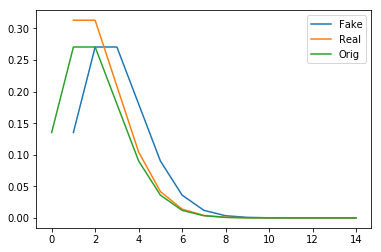

In [65]:
lam = 2
plot_func(pdf1, 1, 15, label='Fake')
plot_func(pdf2, 1, 15, label='Real')
plot_func(stats.poisson(lam).pmf, 0, 15, label='Orig')

plt.legend()

In [ ]:
[1.6449405538359898, 18.836, .940169]

In [67]:
[1.39968, 18.823, .7995]

[1.39968, 18.823, 0.7995]

In [68]:
7104

7104

In [69]:
7094

7094

In [71]:
WEATHER_ALL = ['temperature', 'humidity', 'rain', 'wind']
WEATHER_ALL_VPD = ['temperature', 'humidity', 'rain', 'wind', 'vpd']
WEATHER_ALL_NO_WIND = ['temperature', 'humidity', 'rain']
WEATHER_ALL_NO_RAIN = ['temperature', 'humidity', 'wind']
TEMP_HUMID = ['temperature', 'humidity']
DETECTIONS = ['num_det']
FIRE_LENGTH = ['fire_length']
FIRE_LENGTH_BIAS = ['fire_length_bias']
ALL_YEARS = None
IN_SAMPLE = [None]
LEARN_CONST = 0
params = {
    'model_structure': 'grid',
    'separated_ignitions': 'active_only',
    'active_model_type': 'hurdle_p',
    'ignition_model_type': '',
    'covariates': ['vpd'],
    'active_covariates_exclude': [],
    'ignition_covariates_exclude': DETECTIONS,
    'log_covariates': DETECTIONS,
    'memory_type': 'none',
    'memory_covariates': ['vpd'],
    'memory_log_covariates': DETECTIONS,
    'memory_length': 10,
    'decay_method': 'fixed',
    'decay_values': {'default': .5, 'num_det': .25, 'temperature': .25, 'humidity': .5, 'rain': .25},
    'forecast_method': 'separate',
    'active_check_days': 1,
    'regularization_weight': None,
    'log_correction_type': 'max',
    'log_correction_constant': .5,
    'fill_method': 'interpolate',
    'forecast_horizon': 5,
    'years_test': IN_SAMPLE,
    'normalize_params': False,
    'rain_offset': 0,
    'exposure': False,
    'use_era': True,
    'filter_mask': 'no_ocean',
    'large_fire_split_percent': .9,
}

In [74]:
file_str = os.path.join(DATA_DIR, 'processed/grid/grid_ds_era_4_modis_alaska_2007-01-01_2016-12-31_interpolate_0roff_%dk.nc')
in_files = {k: file_str % k for k in range(1,6)}

start_date = dt.date(2007,1,1)
end_date = dt.date(2016,12,31)
forecast_horizon = 5

X_grid_dict_nw, y_grid_dict, _, _, _ = train_pipeline.setup_data(in_files, start_date, end_date, forecast_horizon, params)


380 300


In [76]:
X_grid_dict_nw[1][0]

<xarray.Dataset>
Dimensions:         (time: 1100, x: 55, y: 33)
Coordinates:
  * time            (time) datetime64[ns] 2007-05-14 2007-05-15 2007-05-16 ...
Dimensions without coordinates: x, y
Data variables:
    num_det         (y, x, time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    num_det_target  (y, x, time) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    active          (y, x, time) bool False False False False False False ...
    temperature     (y, x, time) float32 264.687 267.243 269.273 269.217 ...
    humidity        (y, x, time) float32 85.8478 88.3131 90.076 94.0556 ...
    wind            (y, x, time) float32 4.78804 5.8777 1.64065 4.53513 ...
    rain            (y, x, time) float32 2.05111e-05 0.0 0.0 0.0 0.000329522 ...
    in_filled       (y, x, time) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    interpolated    (y, x, time) int8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    vpd             (y, x, time) float64 0.04567 0.04596 0.04553 0.02716 ...
    

In [101]:
inds = np.nonzero(~X_grid_dict_nw[1][0].filter_mask.values & X_grid_dict_nw[1][0].active.values)[0:2]

In [102]:
inds

(array([22, 22, 22, 22, 22, 22, 22, 23, 27, 27]),
 array([25, 44, 44, 44, 44, 44, 44, 29, 26, 26]))

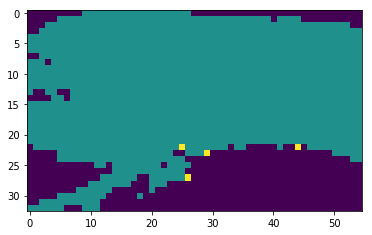

In [113]:
mask = 
mask[inds] = 2
plt.imshow(mask)

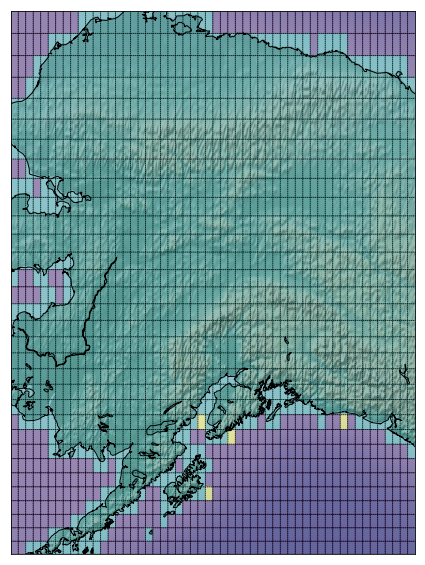

In [118]:
plt.rcParams['figure.figsize'] = [10,10]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

weather_proc_region_src = os.path.join('/extra/graffc0/fire_prediction/data', 'interim/gfs/weather_proc/4/weather_proc_gfs_4_alaska_2007-2016.pkl')
weather_proc_region = load.load_pickle(weather_proc_region_src)

mp = vmap.make_map(weather_proc_region.bounding_box, (0, .5, 0, .5))
mp.shadedrelief()

values = X_grid_dict_nw[1][0].filter_mask.values[:,:,0].astype('uint8')
values[inds] = 2
lats, lons = weather_proc_region.bounding_box.make_grid(inclusive_lon=True)

cs = mp.pcolormesh(lons, lats , values, latlon=True, alpha=.4)